# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score


In [2]:
df = pd.read_csv('dados_limpos.csv')

In [3]:
df.head(2)

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS,MAU
0,5008806,0,1,1,0,112500.0,0,0,0,-21474,-1134,1,0,0,0,2,7,True
1,5008808,1,0,1,0,270000.0,1,0,1,-19110,-3051,1,0,1,1,1,0,True


In [4]:
y=df.MAU
x=df.drop(columns=['MAU'])

In [14]:
clf = DecisionTreeClassifier(random_state=10)

In [15]:
x_treino,x_test, y_treino, y_test= train_test_split(x,y,test_size=0.3,random_state=10)

#### 2) Vamos para o modelo:

1. Defina um objeto com a função da árvore de decisão vista em aula.
2. Treine o modelo com os dados que você separou para treinamento.
3. Visualize a árvore. Talvez você queira aumentar um pouco a figura.
4. Produza uma visualização da matriz de classificação (ou matriz de confusão) - coloque os rótulos como "aprovados" e "reprovados" - pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.
5. Calcule a acurácia na base de treinamento

In [16]:
clf.fit(x_treino,y_treino)

DecisionTreeClassifier(random_state=10)

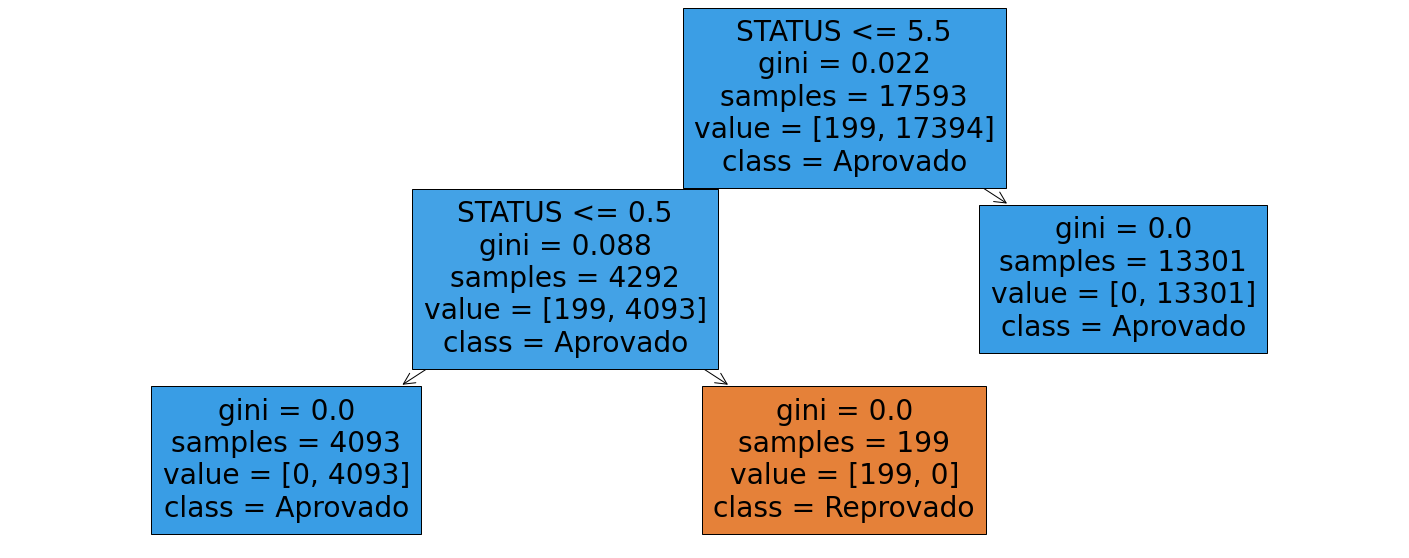

In [17]:
plt.figure(figsize=(25,10));
plot_tree(clf, filled=True, class_names=['Reprovado','Aprovado'], feature_names=x.columns);

c:\users\net\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


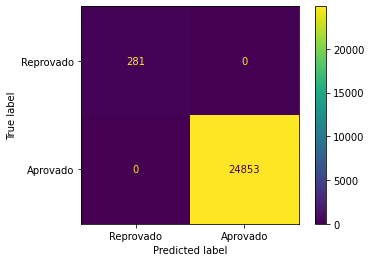

In [18]:
plot_confusion_matrix(clf,x,y,display_labels=['Reprovado','Aprovado']);

In [19]:
predict = clf.predict(x)

In [20]:
accuracy_score(y,predict)

1.0

#### 3) Vamos avaliar o modelo na base de testes

1. Classifique a base de teste de acordo com a árvore que você treinou no item 2.
2. Produza a visualização da matriz de confusão para a base de teste.
3. Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.
4. Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. Use o random_state = 123. Avalie a matriz de classificação. Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?
5. Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [21]:
clf = DecisionTreeClassifier(random_state=123)

x_treino,x_test, y_treino, y_test= train_test_split(x,y,test_size=0.3,random_state=123)

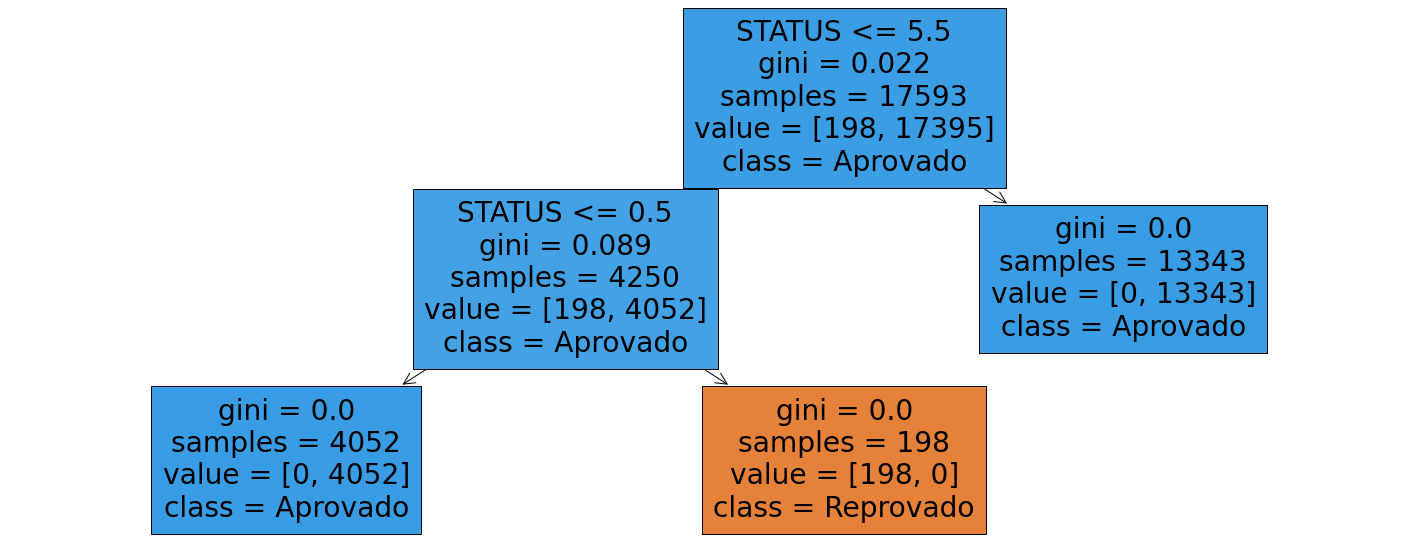

In [22]:
clf.fit(x_treino,y_treino)

plt.figure(figsize=(25,10));
plot_tree(clf, filled=True, class_names=['Reprovado','Aprovado'], feature_names=x.columns);

In [23]:
predict = clf.predict(x)

accuracy_score(y,predict)

1.0

c:\users\net\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


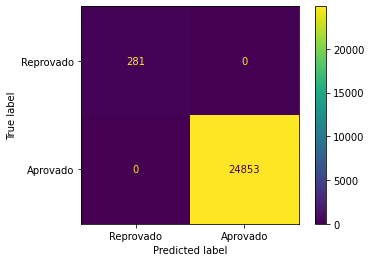

In [24]:
plot_confusion_matrix(clf,x,y,display_labels=['Reprovado','Aprovado']);

In [25]:
df_bom = df

In [34]:
df_bom['MAU']=False

In [35]:
y=df_bom.MAU
x=df_bom.drop(columns=['MAU'])

clf = DecisionTreeClassifier(random_state=10)

x_treino,x_test, y_treino, y_test= train_test_split(x,y,test_size=0.3,random_state=10)

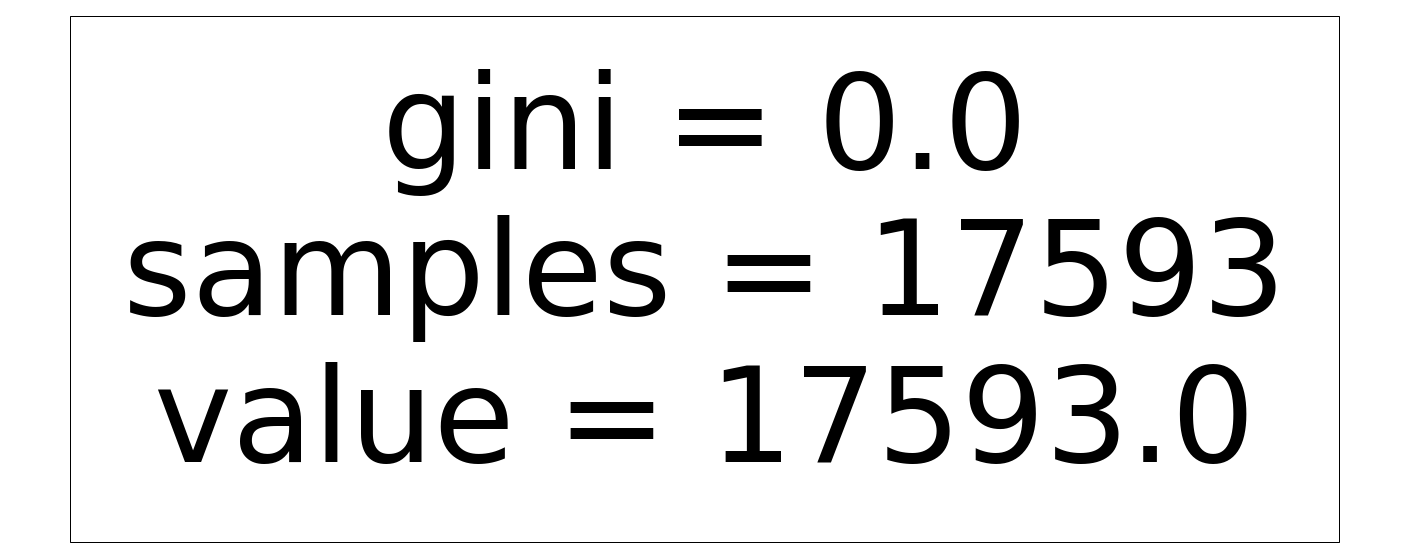

In [36]:
clf.fit(x_treino,y_treino)

plt.figure(figsize=(25,10));
plot_tree(clf, filled=True, class_names=['Reprovado','Aprovado'], feature_names=x.columns);

In [37]:
predict = clf.predict(x)

accuracy_score(y,predict)

1.0